In [1]:
# Description: This program uses artificial recurrect neural netword called Long Short Term Memory (LSTM)
#             To predict the closing stock price of any corporation (Apple Inc.) using past 60 day stock price.

In [2]:
# Import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Get Stock quote
# Use yfinance as pandas_datareader from yahoo finance is often unreliable
import yfinance as yf

df = yf.download('AAPL', start='2016-01-01', end='2025-12-30')

# Show data
df

/tmp/ipython-input-1397978635.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2016-01-01', end='2025-12-30')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-04,23.753151,23.757661,22.997830,23.135367,270597600
2016-01-05,23.157915,23.865887,23.090275,23.843341,223164000
2016-01-06,22.704721,23.081256,22.517584,22.673156,273829600
2016-01-07,21.746483,22.576209,21.741974,22.249279,324377600
2016-01-08,21.861469,22.346228,21.816376,22.219966,283192000
...,...,...,...,...,...
2025-12-22,270.970001,273.880005,270.510010,272.859985,36571800
2025-12-23,272.359985,272.500000,269.559998,270.839996,29642000


In [4]:
# Get number of rows and columns in data set
df.shape

(2512, 5)

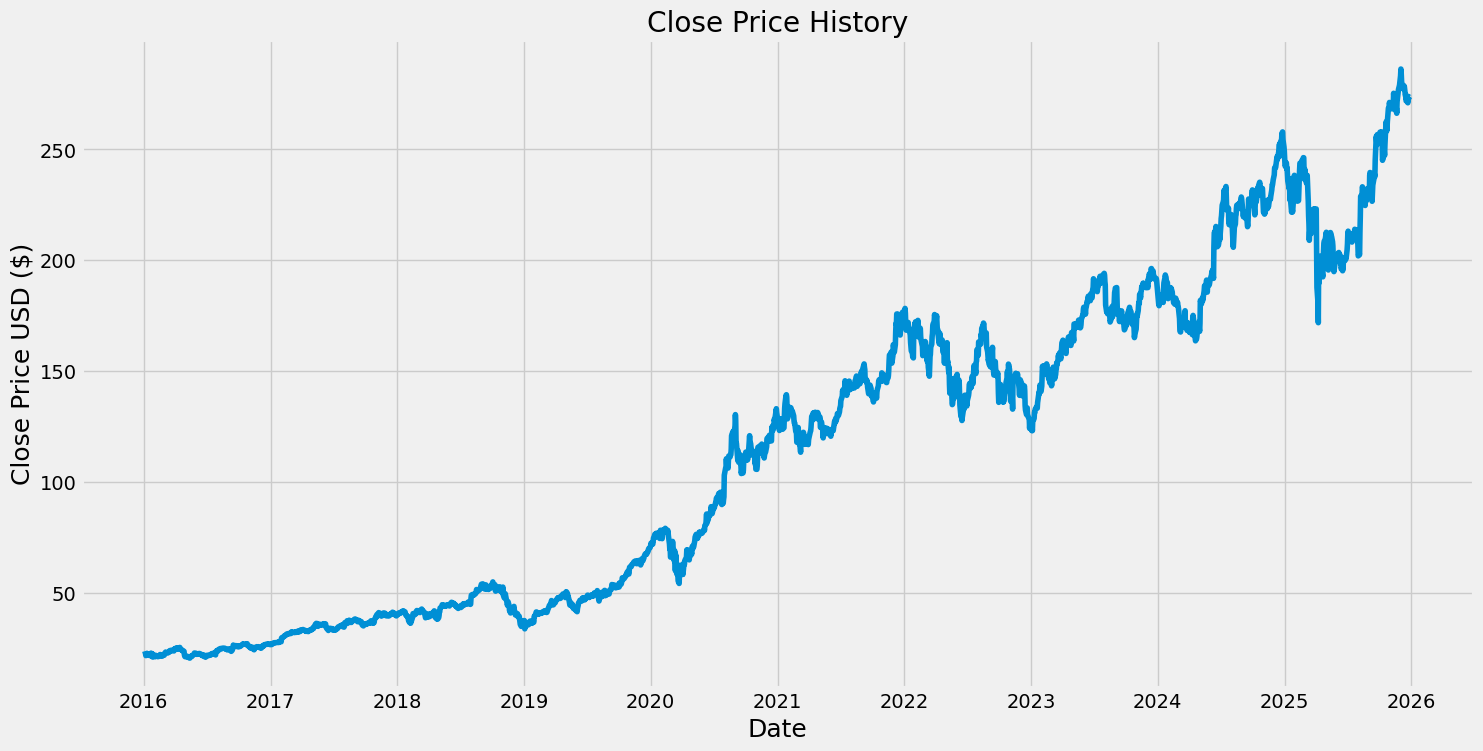

In [5]:
# Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [6]:
# Create a new data frame with only the 'Close Column
data = df[['Close']]
# Convert data frame to a numpy array
dataset = data.values
# Get number of rows to train model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len  # 80% of dataset

2010

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01185709],
       [0.00961587],
       [0.00790948],
       ...,
       [0.95338607],
       [0.9518423 ],
       [0.95319785]])

In [8]:
# Create training data set

# create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# split data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.01185709, 0.00961587, 0.00790948, 0.00430146, 0.00473442,
       0.00606728, 0.00728127, 0.00509947, 0.00690773, 0.00487872,
       0.00447973, 0.00459012, 0.0041741 , 0.00852071, 0.00683981,
       0.00730674, 0.00172914, 0.00229792, 0.005057  , 0.00428447,
       0.00262903, 0.00421653, 0.00487379, 0.00267159, 0.00351663,
       0.00349959, 0.002885  , 0.00239846, 0.00264598, 0.00490794,
       0.00617118, 0.00458355, 0.0043958 , 0.00511277, 0.0032435 ,
       0.004447  , 0.00501035, 0.00513838, 0.00495061, 0.00822826,
       0.00841605, 0.00905621, 0.01034507, 0.00937204, 0.00865504,
       0.00873186, 0.00877453, 0.00970492, 0.00992683, 0.01168516,
       0.01287161, 0.01272649, 0.01282892, 0.01282038, 0.01351176,
       0.01300817, 0.01261554, 0.01220585, 0.01433117, 0.01593587])]
[np.float64(0.015449351447354653)]

[array([0.01185709, 0.00961587, 0.00790948, 0.00430146, 0.00473442,
       0.00606728, 0.00728127, 0.00509947, 0.00690773, 0.00487872,
       0.00447973, 0.0

In [9]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
# Reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1950, 60, 1)

In [11]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# Train model
model.fit (x_train, y_train, batch_size=1, epochs=1)

1950/1950 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step - loss: 0.0024


In [14]:
# Create testing dataset
# Create a new array containing scaled values from index
test_data = scaled_data[training_data_len - 60: , :]
# create data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [15]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [16]:
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [18]:
# Get root mean square error (RMSE)
rmse = np.sqrt(np.mean (predictions - y_test) ** 2)
rmse

np.float64(0.890719622729784)

/tmp/ipython-input-3272441490.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


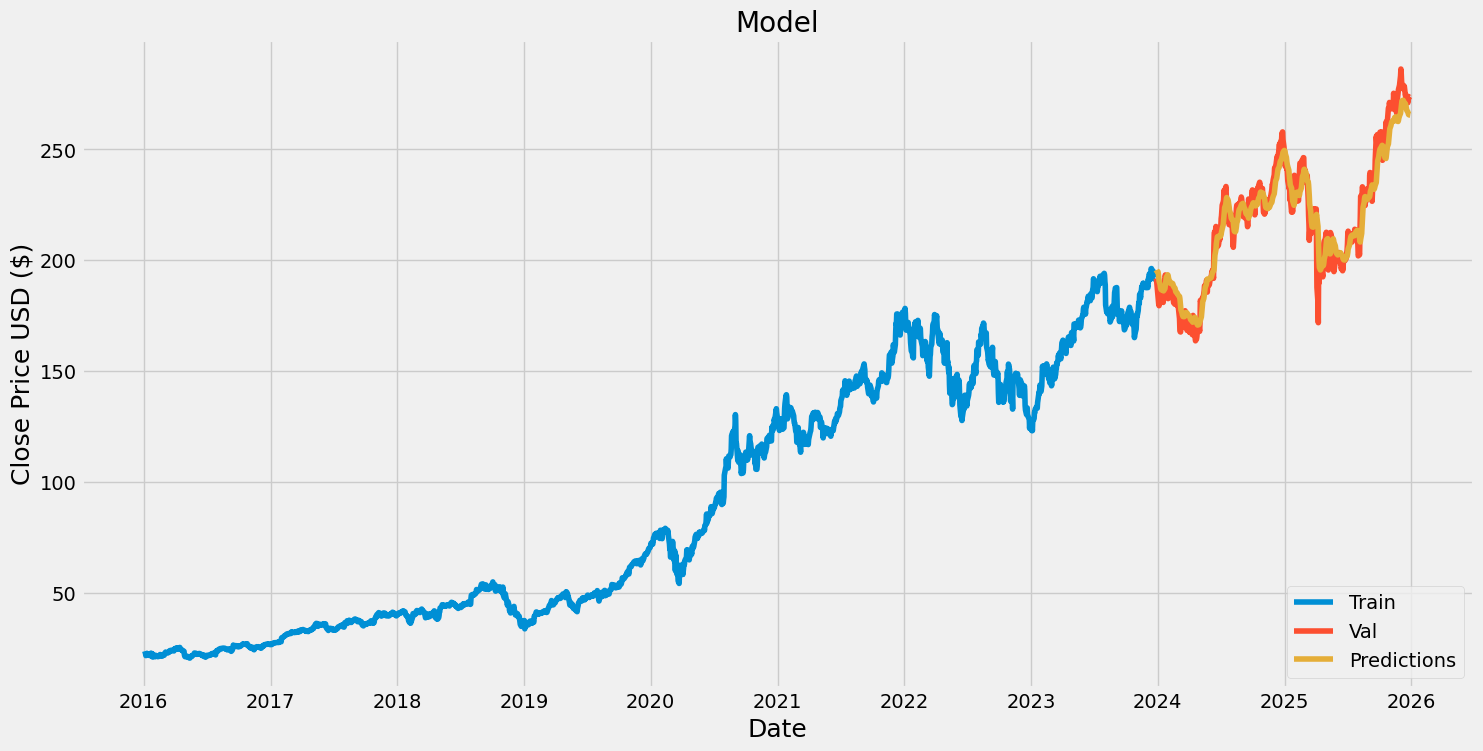

In [19]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [20]:
# Show valid and predicted prices
valid

Price,Close,Predictions
Ticker,AAPL,
Date,,
2023-12-28,191.768951,195.567276
2023-12-29,190.728745,195.200836
2024-01-02,183.903259,194.816681
2024-01-03,182.526230,193.779953
2024-01-04,180.208130,192.375732
...,...,...
2025-12-22,270.970001,266.857971
2025-12-23,272.359985,266.181885


In [21]:
# Get the quote
apple_quote = yf.download('AAPL', start='2016-01-01', end='2025-12-30')
# Create a new dataframe
new_df = apple_quote[['Close']]
# Get last 60 day closing price values and convert dataframe to an array
last_60_days = new_df[-60:].values
# Scale data to be value b/w 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create empty list
X_test = []
# Append past 60 days
X_test.append(last_60_days_scaled)
# Convert X_test data set to numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get predicted scaled price
pred_price = model.predict(X_test)
# Undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)  # prints predicted price...

/tmp/ipython-input-4186139063.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple_quote = yf.download('AAPL', start='2016-01-01', end='2025-12-30')
[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[265.4462]]
